In [1]:
# import libaries

from helper import *
from cfg import CFG

In [2]:
# check Values and Sizes from Training / Validation Set

# Images have varying sizes (some 256,256 and 512,512)

check_img_dataset_values(img_train_path=CFG.img_train_path, img_valid_path=CFG.img_valid_path)

Number of training images: 893
Number of validation images: 223
Training images have varying sizes.
Validation images have varying sizes.


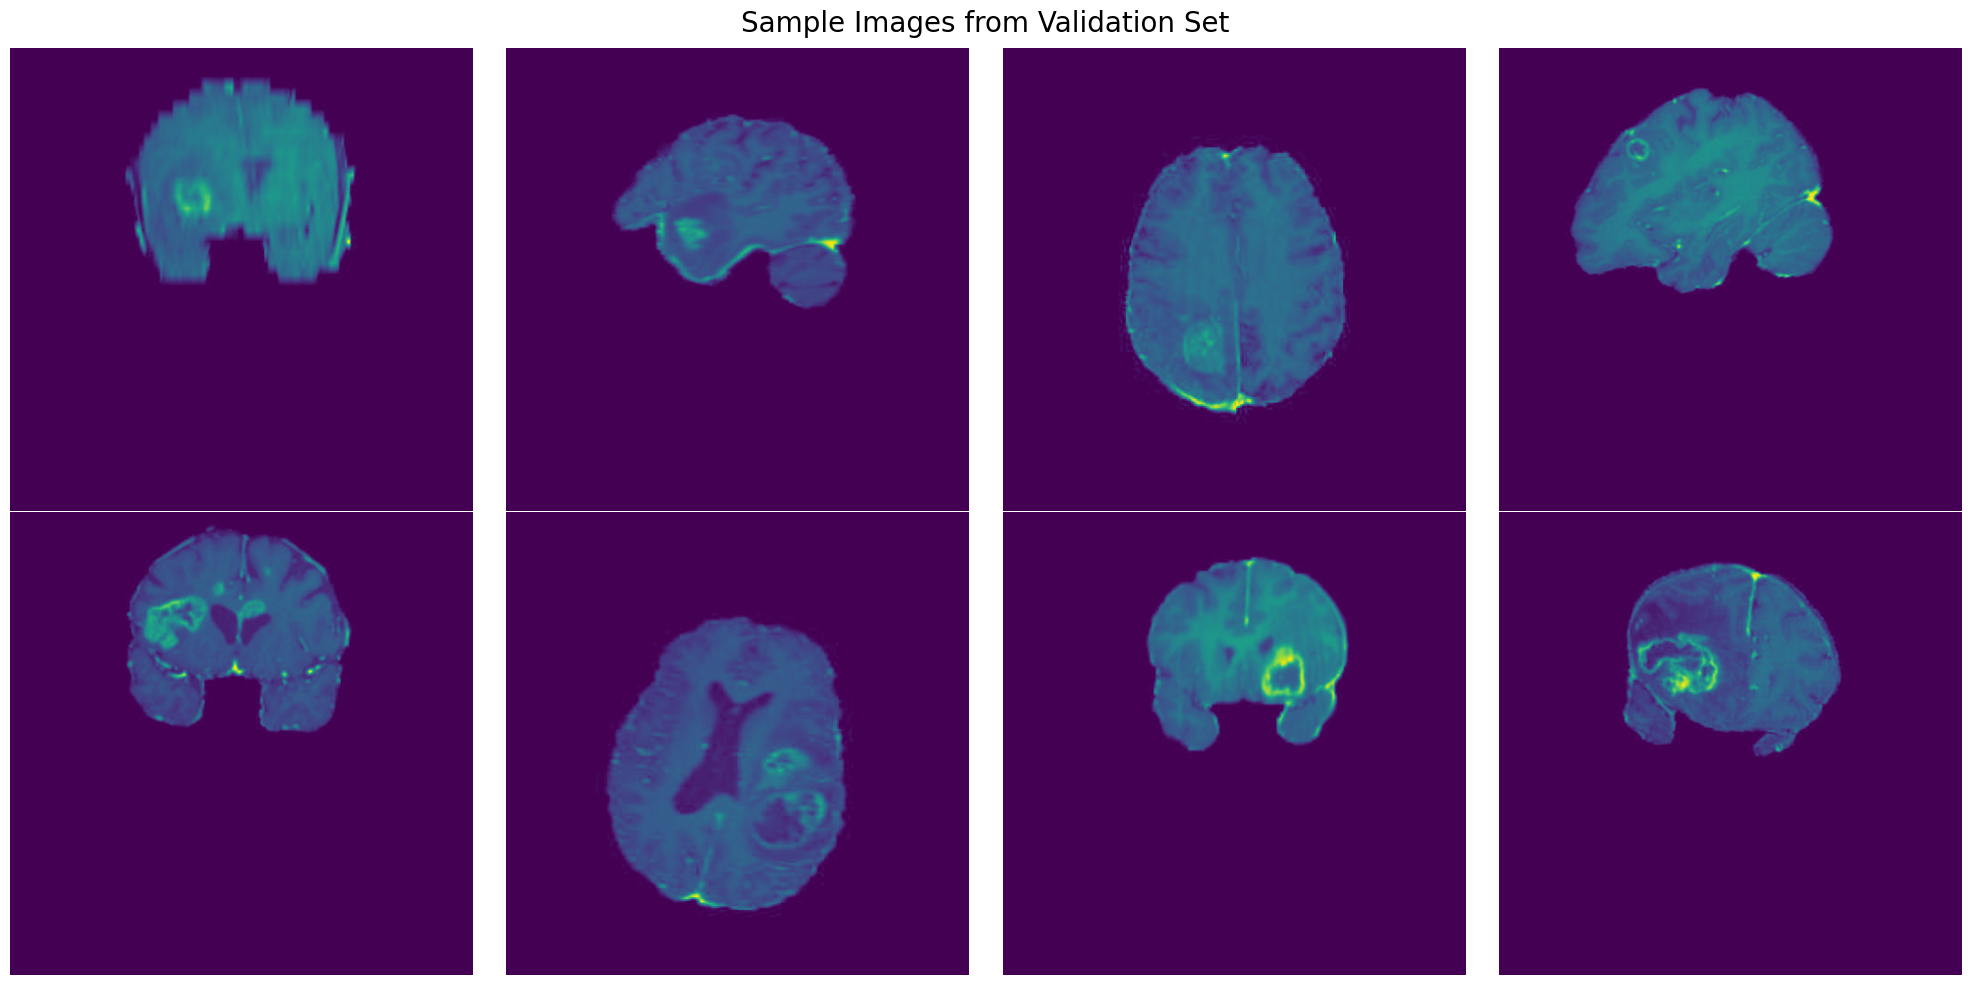

In [3]:
# see some random samples from Validation Set

plot_random_samples(path=CFG.img_valid_path, plot_title="Sample Images from Validation Set")

In [4]:
# load pretrained base model (yolov8n.pt)

model = load_model(preset_name=CFG.yolo_preset_name)


image 1/1 /home/ubuntu/dev/yolo-tumor/dataset/brain-tumor/valid/images/val_1 (85).jpg: 640x640 (no detections), 3.5ms
Speed: 2.4ms preprocess, 3.5ms inference, 11.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/ubuntu/dev/yolo-tumor/dataset/brain-tumor/valid/images/val_1 (3).jpg: 640x640 (no detections), 3.6ms
Speed: 1.7ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/ubuntu/dev/yolo-tumor/dataset/brain-tumor/valid/images/val_1 (97).jpg: 640x640 (no detections), 3.9ms
Speed: 1.4ms preprocess, 3.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/ubuntu/dev/yolo-tumor/dataset/brain-tumor/valid/images/val_1 (33).jpg: 640x640 (no detections), 3.9ms
Speed: 1.5ms preprocess, 3.9ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/ubuntu/dev/yolo-tumor/dataset/brain-tumor/valid/images/val_1 (53).jpg: 640x640 (no detections), 4.5ms
Speed: 1.2ms preproce

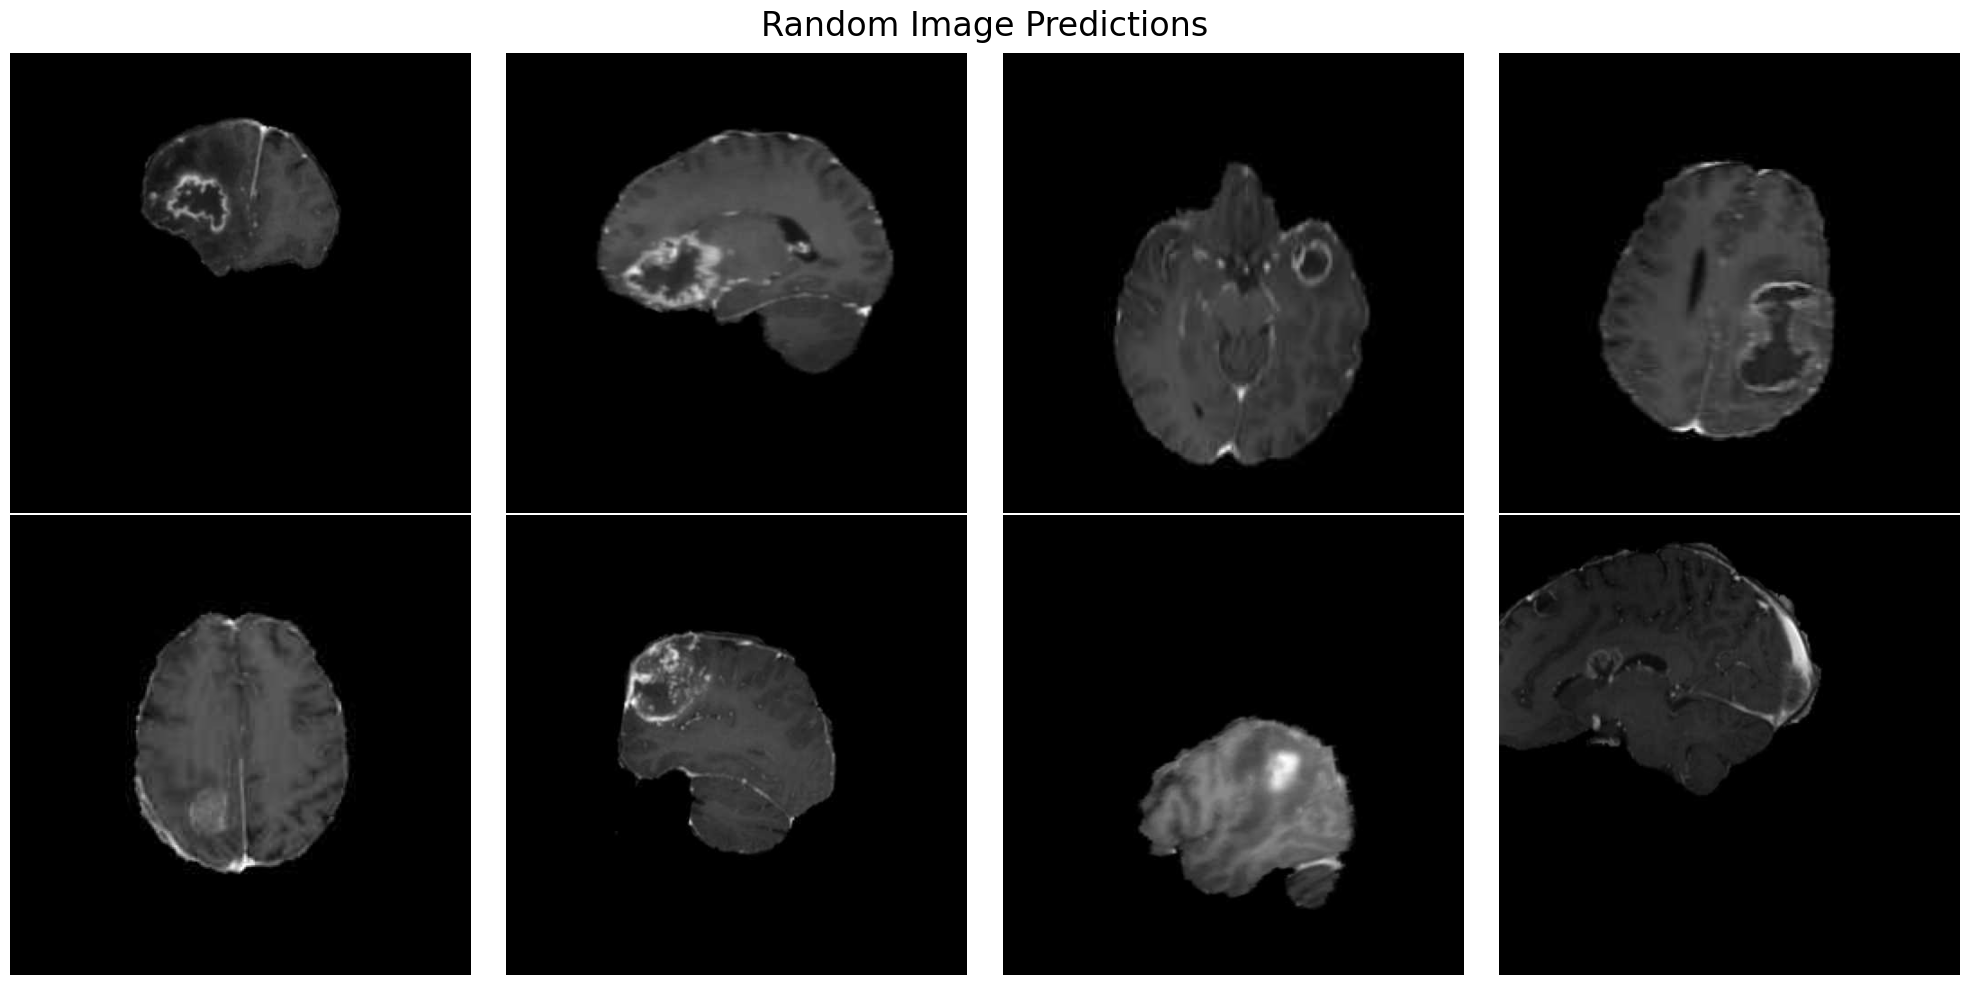

In [5]:
# detects the pretrained model something? (conf=0.5)

predict_random_samples(
    model=model,
    img_path=CFG.img_valid_path,
    figsize=(20, 10),
    ncols=4,
    nrows=2,
    n_images=8,
    conf=0.5
)

In [6]:
# finetune yolov8 model on brain-tumor detection

results = train_yolo_model(
    model=model,
    yaml_file_path=CFG.yaml_file_path,
    epochs=CFG.epochs,
    imgsz=CFG.imgsz,
    device=CFG.device,
    patience=CFG.patience,
    batch=CFG.batch,
    optimizer=CFG.optimizer,
    lr0=CFG.lr0,
    lrf=CFG.lrf,
    dropout=CFG.dropout,
    seed=CFG.seed,
)

New https://pypi.org/project/ultralytics/8.2.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.42 🚀 Python-3.10.14 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4070, 12002MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=./dataset/brain-tumor.yaml, epochs=200, time=None, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fa

train: Scanning /home/ubuntu/dev/yolo-tumor/dataset/brain-tumor/train/labels... 878 images, 15 backgrounds, 0 corrupt: 100%|██████████| 893/893 [00:00<00:00, 918.29it/s]

train: New cache created: /home/ubuntu/dev/yolo-tumor/dataset/brain-tumor/train/labels.cache



val: Scanning /home/ubuntu/dev/yolo-tumor/dataset/brain-tumor/valid/labels... 223 images, 0 backgrounds, 0 corrupt: 100%|██████████| 223/223 [00:00<00:00, 1585.36it/s]

val: New cache created: /home/ubuntu/dev/yolo-tumor/dataset/brain-tumor/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      4.49G      2.123      4.348      1.833         44        640: 100%|██████████| 28/28 [00:04<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]

                   all        223        241    0.00147      0.415     0.0115    0.00457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      4.49G      1.267      2.383      1.166         44        640: 100%|██████████| 28/28 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.72it/s]

                   all        223        241      0.491      0.113      0.221      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      4.49G      1.162       1.98      1.112         47        640: 100%|██████████| 28/28 [00:03<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.86it/s]

                   all        223        241      0.454      0.516      0.362      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      4.49G      1.136      1.791      1.098         44        640: 100%|██████████| 28/28 [00:03<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.46it/s]

                   all        223        241      0.441      0.758       0.47      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      4.49G      1.125      1.623      1.101         50        640: 100%|██████████| 28/28 [00:03<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.18it/s]

                   all        223        241      0.456      0.782      0.466      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      4.49G      1.108      1.461      1.081         33        640: 100%|██████████| 28/28 [00:03<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.22it/s]

                   all        223        241      0.448      0.822      0.474      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      4.49G      1.069      1.372      1.063         58        640: 100%|██████████| 28/28 [00:03<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.27it/s]

                   all        223        241      0.468      0.859      0.494      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      4.49G      1.065      1.293      1.055         51        640: 100%|██████████| 28/28 [00:03<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.34it/s]

                   all        223        241      0.464      0.801      0.487      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      4.49G      1.025      1.225      1.044         37        640: 100%|██████████| 28/28 [00:03<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.04it/s]

                   all        223        241       0.39      0.806      0.465      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      4.49G      1.035      1.222      1.056         48        640: 100%|██████████| 28/28 [00:03<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.26it/s]

                   all        223        241      0.438      0.839      0.489       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      4.49G      1.025      1.201      1.026         43        640: 100%|██████████| 28/28 [00:03<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.80it/s]

                   all        223        241      0.406      0.824      0.494      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      4.49G      1.027      1.205      1.039         46        640: 100%|██████████| 28/28 [00:03<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.86it/s]

                   all        223        241       0.44      0.866       0.46      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      4.49G      1.011      1.121       1.04         54        640: 100%|██████████| 28/28 [00:03<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.59it/s]

                   all        223        241       0.37      0.829      0.463      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      4.49G      1.002      1.129      1.032         47        640: 100%|██████████| 28/28 [00:03<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.11it/s]

                   all        223        241      0.479      0.799      0.499      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      4.49G     0.9969      1.105      1.025         45        640: 100%|██████████| 28/28 [00:03<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.38it/s]

                   all        223        241      0.378      0.826      0.432      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      4.49G     0.9738      1.082      1.022         49        640: 100%|██████████| 28/28 [00:03<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.05it/s]

                   all        223        241      0.425      0.818      0.452      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      4.49G      1.027      1.071      1.056         37        640: 100%|██████████| 28/28 [00:03<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.11it/s]

                   all        223        241      0.387      0.802      0.419      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      4.49G     0.9919      1.062      1.041         58        640: 100%|██████████| 28/28 [00:03<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]

                   all        223        241      0.407      0.829      0.435       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      4.49G     0.9635      1.041      1.016         56        640: 100%|██████████| 28/28 [00:03<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.14it/s]

                   all        223        241      0.381      0.844      0.429       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      4.49G     0.9596      1.012      1.022         48        640: 100%|██████████| 28/28 [00:03<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.15it/s]

                   all        223        241       0.46      0.834      0.515      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      4.49G     0.9492     0.9812      1.014         45        640: 100%|██████████| 28/28 [00:03<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.13it/s]

                   all        223        241      0.428       0.73      0.465      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      4.49G     0.9586     0.9661      1.015         44        640: 100%|██████████| 28/28 [00:03<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.91it/s]

                   all        223        241      0.429      0.756      0.488      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      4.49G     0.9803     0.9802      1.023         54        640: 100%|██████████| 28/28 [00:03<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.11it/s]

                   all        223        241      0.456      0.761      0.497      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      4.49G     0.9558     0.9613       1.02         48        640: 100%|██████████| 28/28 [00:03<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.14it/s]

                   all        223        241      0.391      0.803      0.453      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      4.49G     0.9239     0.9663      1.001         45        640: 100%|██████████| 28/28 [00:03<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.17it/s]

                   all        223        241      0.448      0.784      0.469      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      4.49G       0.97      0.943      1.021         43        640: 100%|██████████| 28/28 [00:03<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.14it/s]

                   all        223        241      0.429      0.767      0.506      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      4.49G     0.9383     0.9678      1.016         50        640: 100%|██████████| 28/28 [00:03<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.34it/s]

                   all        223        241       0.39      0.823      0.472      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      4.49G      0.922     0.9299      1.008         57        640: 100%|██████████| 28/28 [00:03<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.16it/s]

                   all        223        241      0.405      0.742      0.478      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      4.49G     0.9041     0.8829     0.9925         43        640: 100%|██████████| 28/28 [00:03<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.88it/s]

                   all        223        241      0.443        0.7      0.506      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      4.49G      0.929     0.8832      1.002         47        640: 100%|██████████| 28/28 [00:03<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.75it/s]

                   all        223        241      0.387      0.821      0.438      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      4.49G     0.9184      0.891      1.002         56        640: 100%|██████████| 28/28 [00:03<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.15it/s]

                   all        223        241      0.417      0.778      0.497      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      4.49G     0.8887     0.8261     0.9999         44        640: 100%|██████████| 28/28 [00:03<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.16it/s]

                   all        223        241      0.411      0.781      0.479      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      4.49G     0.9269     0.8441     0.9928         45        640: 100%|██████████| 28/28 [00:03<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.75it/s]

                   all        223        241      0.434      0.816      0.548        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      4.49G     0.8901     0.8435     0.9953         52        640: 100%|██████████| 28/28 [00:03<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.96it/s]

                   all        223        241      0.428      0.711      0.481      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      4.49G     0.8865       0.85     0.9786         44        640: 100%|██████████| 28/28 [00:03<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.11it/s]

                   all        223        241      0.419      0.819      0.481      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      4.49G     0.8996     0.8431     0.9963         49        640: 100%|██████████| 28/28 [00:03<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.11it/s]

                   all        223        241      0.403      0.676      0.474      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      4.49G     0.9139     0.8245     0.9925         42        640: 100%|██████████| 28/28 [00:03<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.10it/s]

                   all        223        241      0.433      0.784      0.525      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      4.49G      0.903     0.8156     0.9971         42        640: 100%|██████████| 28/28 [00:03<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.14it/s]

                   all        223        241      0.401      0.738      0.464      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      4.49G     0.8975     0.8061     0.9893         50        640: 100%|██████████| 28/28 [00:03<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.40it/s]

                   all        223        241      0.413      0.813      0.474      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      4.49G     0.9099     0.7851     0.9952         43        640: 100%|██████████| 28/28 [00:03<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.10it/s]

                   all        223        241      0.426      0.814      0.513       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      4.49G     0.8722     0.7712     0.9852         55        640: 100%|██████████| 28/28 [00:03<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.08it/s]

                   all        223        241      0.444      0.809      0.544      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      4.49G     0.9032     0.7706     0.9905         50        640: 100%|██████████| 28/28 [00:03<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.16it/s]

                   all        223        241      0.399      0.776      0.486      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      4.49G     0.8758      0.766     0.9849         54        640: 100%|██████████| 28/28 [00:03<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.43it/s]

                   all        223        241      0.485       0.68      0.549      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      4.49G     0.8701     0.7356     0.9833         37        640: 100%|██████████| 28/28 [00:03<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.15it/s]

                   all        223        241      0.486      0.734      0.601      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      4.49G     0.8549     0.7697     0.9802         46        640: 100%|██████████| 28/28 [00:03<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.14it/s]

                   all        223        241      0.482      0.753      0.556      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      4.49G     0.8888     0.7462     0.9825         64        640: 100%|██████████| 28/28 [00:03<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.10it/s]

                   all        223        241      0.423      0.797       0.51      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      4.49G     0.8564     0.7168     0.9778         51        640: 100%|██████████| 28/28 [00:03<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.13it/s]

                   all        223        241      0.421      0.759        0.5      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      4.49G     0.8564     0.6978      0.968         36        640: 100%|██████████| 28/28 [00:03<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.20it/s]

                   all        223        241      0.467      0.763      0.528      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      4.49G     0.8705     0.7066     0.9823         43        640: 100%|██████████| 28/28 [00:03<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.14it/s]

                   all        223        241      0.389      0.745       0.52      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      4.49G     0.8776     0.7073     0.9837         42        640: 100%|██████████| 28/28 [00:03<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.12it/s]

                   all        223        241      0.412      0.705      0.497       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      4.49G     0.8478     0.6932     0.9806         41        640: 100%|██████████| 28/28 [00:03<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.11it/s]

                   all        223        241      0.543      0.724       0.62      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      4.49G     0.8431     0.7024     0.9645         50        640: 100%|██████████| 28/28 [00:03<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]

                   all        223        241      0.496      0.743      0.593       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      4.49G      0.842     0.7008     0.9576         51        640: 100%|██████████| 28/28 [00:03<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.12it/s]

                   all        223        241      0.462       0.78      0.562      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      4.49G     0.8325     0.6705     0.9597         47        640: 100%|██████████| 28/28 [00:03<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.09it/s]

                   all        223        241      0.438      0.712      0.519      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      4.49G      0.832     0.6722     0.9545         39        640: 100%|██████████| 28/28 [00:03<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.45it/s]

                   all        223        241      0.486      0.701      0.535      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      4.49G     0.8339     0.6685      0.965         50        640: 100%|██████████| 28/28 [00:03<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.12it/s]

                   all        223        241      0.531      0.672      0.568       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      4.49G     0.8299     0.6518     0.9591         47        640: 100%|██████████| 28/28 [00:03<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.12it/s]

                   all        223        241      0.486      0.671       0.52      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      4.49G     0.8106     0.6449      0.962         46        640: 100%|██████████| 28/28 [00:03<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.39it/s]

                   all        223        241      0.446      0.766      0.571      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      4.49G     0.8388     0.6399     0.9663         36        640: 100%|██████████| 28/28 [00:03<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.13it/s]

                   all        223        241      0.485      0.742      0.575      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      4.49G      0.834     0.6606     0.9733         37        640: 100%|██████████| 28/28 [00:03<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.17it/s]

                   all        223        241      0.438      0.748      0.542      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      4.49G     0.8283     0.6193     0.9541         52        640: 100%|██████████| 28/28 [00:03<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.68it/s]

                   all        223        241      0.514      0.607      0.525       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      4.49G     0.8301     0.6523     0.9672         39        640: 100%|██████████| 28/28 [00:03<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.10it/s]

                   all        223        241      0.454      0.745      0.553      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      4.49G     0.8402      0.618     0.9672         45        640: 100%|██████████| 28/28 [00:03<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.18it/s]

                   all        223        241      0.445      0.677      0.515      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      4.49G     0.8188      0.625     0.9578         35        640: 100%|██████████| 28/28 [00:03<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.23it/s]

                   all        223        241      0.483      0.789      0.584      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      4.49G     0.8348     0.5993     0.9633         46        640: 100%|██████████| 28/28 [00:03<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.32it/s]

                   all        223        241      0.491      0.697      0.547      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      4.49G     0.7923     0.6024     0.9462         51        640: 100%|██████████| 28/28 [00:03<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.42it/s]

                   all        223        241      0.485      0.658      0.528      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      4.49G     0.8049     0.5909     0.9552         46        640: 100%|██████████| 28/28 [00:03<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.34it/s]

                   all        223        241       0.46      0.732      0.519      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      4.49G     0.7943      0.575     0.9476         44        640: 100%|██████████| 28/28 [00:03<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.28it/s]

                   all        223        241      0.444      0.747      0.567      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      4.49G     0.8228     0.6046     0.9659         42        640: 100%|██████████| 28/28 [00:03<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.29it/s]

                   all        223        241      0.472      0.716      0.562      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      4.49G      0.807     0.6034     0.9465         41        640: 100%|██████████| 28/28 [00:03<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.23it/s]

                   all        223        241      0.445      0.641      0.518      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      4.49G      0.804     0.5662     0.9442         41        640: 100%|██████████| 28/28 [00:03<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.28it/s]

                   all        223        241      0.449       0.74      0.529       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      4.49G     0.7986     0.5547     0.9496         53        640: 100%|██████████| 28/28 [00:03<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.18it/s]

                   all        223        241      0.488      0.681      0.515      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      4.49G     0.8004     0.5885     0.9476         50        640: 100%|██████████| 28/28 [00:03<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.74it/s]

                   all        223        241      0.417      0.718      0.494      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      4.49G      0.777     0.5518     0.9442         34        640: 100%|██████████| 28/28 [00:03<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.21it/s]

                   all        223        241      0.462       0.66        0.5      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      4.49G     0.7721     0.5646     0.9387         55        640: 100%|██████████| 28/28 [00:03<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.15it/s]

                   all        223        241       0.44      0.728      0.531      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      4.49G     0.7826     0.5686     0.9464         45        640: 100%|██████████| 28/28 [00:03<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.91it/s]

                   all        223        241      0.411       0.68      0.487      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      4.49G     0.7779     0.5773     0.9518         47        640: 100%|██████████| 28/28 [00:03<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.97it/s]

                   all        223        241      0.473       0.69      0.516       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      4.49G     0.7924     0.5818     0.9456         41        640: 100%|██████████| 28/28 [00:03<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.23it/s]

                   all        223        241      0.489      0.703       0.55      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      4.49G     0.7437     0.5451     0.9318         36        640: 100%|██████████| 28/28 [00:03<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.15it/s]

                   all        223        241      0.542      0.645      0.558      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      4.49G     0.7912     0.5501     0.9395         33        640: 100%|██████████| 28/28 [00:03<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.00it/s]

                   all        223        241      0.459      0.706       0.51      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      4.49G     0.7613     0.5461     0.9471         44        640: 100%|██████████| 28/28 [00:03<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.18it/s]

                   all        223        241      0.455      0.747      0.526       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      4.49G     0.7735     0.5638     0.9489         49        640: 100%|██████████| 28/28 [00:03<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.08it/s]

                   all        223        241      0.479      0.707      0.539      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      4.49G     0.7605      0.533     0.9288         41        640: 100%|██████████| 28/28 [00:03<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.13it/s]

                   all        223        241      0.441      0.745        0.5      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      4.49G     0.7609     0.5245     0.9321         52        640: 100%|██████████| 28/28 [00:03<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.27it/s]

                   all        223        241      0.465      0.762       0.54      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      4.49G     0.7644      0.539     0.9464         45        640: 100%|██████████| 28/28 [00:03<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.87it/s]

                   all        223        241      0.523      0.587      0.535      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      4.49G     0.7711     0.5295     0.9361         49        640: 100%|██████████| 28/28 [00:03<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.84it/s]

                   all        223        241      0.597      0.584       0.59      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      4.49G     0.7565     0.5734     0.9443         33        640: 100%|██████████| 28/28 [00:03<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.62it/s]

                   all        223        241      0.449      0.676      0.465      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      4.49G      0.753     0.5309      0.938         33        640: 100%|██████████| 28/28 [00:03<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.90it/s]

                   all        223        241      0.472      0.736      0.534      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      4.49G     0.7386     0.5233     0.9326         49        640: 100%|██████████| 28/28 [00:03<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.78it/s]

                   all        223        241      0.491      0.719      0.536      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      4.49G     0.7378     0.5319      0.938         55        640: 100%|██████████| 28/28 [00:03<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.68it/s]

                   all        223        241      0.486      0.708       0.54       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      4.49G     0.7769      0.516     0.9448         42        640: 100%|██████████| 28/28 [00:03<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.75it/s]

                   all        223        241       0.42      0.745      0.478      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      4.49G     0.7638     0.5095      0.933         51        640: 100%|██████████| 28/28 [00:03<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.75it/s]

                   all        223        241      0.573      0.602       0.55      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      4.49G     0.7473     0.5168     0.9391         52        640: 100%|██████████| 28/28 [00:03<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.82it/s]

                   all        223        241      0.481      0.763      0.558      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      4.49G     0.7585     0.5042     0.9345         46        640: 100%|██████████| 28/28 [00:03<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.73it/s]

                   all        223        241      0.439      0.669       0.52      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      4.49G     0.7621     0.5135     0.9316         49        640: 100%|██████████| 28/28 [00:03<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.66it/s]

                   all        223        241      0.476      0.764      0.558      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      4.49G     0.7609     0.4892     0.9439         47        640: 100%|██████████| 28/28 [00:03<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.90it/s]

                   all        223        241      0.494      0.787       0.61      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      4.49G     0.7398     0.4897     0.9305         57        640: 100%|██████████| 28/28 [00:03<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.53it/s]

                   all        223        241      0.454      0.738      0.537      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      4.49G     0.7611     0.5176      0.937         46        640: 100%|██████████| 28/28 [00:03<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.76it/s]

                   all        223        241      0.521      0.723      0.574      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      4.49G     0.7448     0.4909     0.9363         45        640: 100%|██████████| 28/28 [00:03<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.76it/s]

                   all        223        241      0.471      0.751      0.534      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      4.49G     0.7496     0.4894     0.9282         56        640: 100%|██████████| 28/28 [00:03<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.87it/s]

                   all        223        241      0.498      0.681      0.564      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      4.49G     0.7253     0.4851     0.9271         53        640: 100%|██████████| 28/28 [00:03<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.86it/s]

                   all        223        241      0.499      0.764      0.617      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      4.49G     0.7261     0.4795     0.9279         43        640: 100%|██████████| 28/28 [00:03<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.01it/s]

                   all        223        241      0.443       0.67      0.505      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      4.49G     0.7245     0.4908     0.9249         51        640: 100%|██████████| 28/28 [00:03<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.83it/s]

                   all        223        241      0.577      0.534       0.56      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      4.49G     0.7357     0.4946     0.9382         37        640: 100%|██████████| 28/28 [00:03<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.98it/s]

                   all        223        241        0.5      0.704      0.559      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      4.49G     0.7414     0.4904     0.9389         44        640: 100%|██████████| 28/28 [00:03<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.95it/s]

                   all        223        241      0.457      0.706      0.522      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      4.49G     0.7029     0.4715     0.9235         51        640: 100%|██████████| 28/28 [00:03<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.10it/s]

                   all        223        241      0.536      0.644      0.548      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      4.49G     0.7253      0.478     0.9274         38        640: 100%|██████████| 28/28 [00:03<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.14it/s]

                   all        223        241      0.448      0.728      0.531      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      4.49G     0.7198     0.4743     0.9257         38        640: 100%|██████████| 28/28 [00:03<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.13it/s]

                   all        223        241      0.552      0.662      0.603      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      4.49G     0.7123     0.4731     0.9249         41        640: 100%|██████████| 28/28 [00:03<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.12it/s]

                   all        223        241      0.451      0.694       0.54      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      4.49G     0.7271     0.4803     0.9271         51        640: 100%|██████████| 28/28 [00:03<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.07it/s]

                   all        223        241      0.492      0.737      0.582      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      4.49G     0.7111     0.4714     0.9214         56        640: 100%|██████████| 28/28 [00:03<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.08it/s]

                   all        223        241      0.463      0.693      0.497      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      4.49G     0.7101      0.486     0.9202         53        640: 100%|██████████| 28/28 [00:03<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.13it/s]

                   all        223        241       0.55      0.654      0.564      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      4.49G     0.6851      0.463      0.907         44        640: 100%|██████████| 28/28 [00:03<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]

                   all        223        241      0.425      0.723      0.501      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      4.49G     0.7192      0.469     0.9185         54        640: 100%|██████████| 28/28 [00:03<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.12it/s]

                   all        223        241       0.43      0.696      0.495      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      4.49G     0.7035     0.4587     0.9162         47        640: 100%|██████████| 28/28 [00:03<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.07it/s]

                   all        223        241      0.553      0.619      0.545      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      4.49G     0.6916     0.4478     0.9239         54        640: 100%|██████████| 28/28 [00:03<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.13it/s]

                   all        223        241      0.496      0.697      0.553      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      4.49G       0.69     0.4472      0.917         43        640: 100%|██████████| 28/28 [00:03<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.05it/s]

                   all        223        241      0.478      0.644      0.527      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      4.49G     0.6991     0.4626     0.9205         44        640: 100%|██████████| 28/28 [00:03<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.19it/s]

                   all        223        241      0.458      0.652      0.495       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      4.49G     0.6841     0.4574     0.9118         46        640: 100%|██████████| 28/28 [00:03<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.17it/s]

                   all        223        241      0.574      0.661      0.588      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      4.49G     0.6999     0.4485     0.9217         40        640: 100%|██████████| 28/28 [00:03<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.13it/s]

                   all        223        241      0.491      0.701      0.567      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      4.49G     0.6885     0.4539     0.9231         56        640: 100%|██████████| 28/28 [00:03<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.21it/s]

                   all        223        241      0.449      0.669      0.515      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      4.49G      0.698     0.4394     0.9158         54        640: 100%|██████████| 28/28 [00:03<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.98it/s]

                   all        223        241      0.467      0.705      0.501      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      4.49G     0.6875      0.438     0.9095         60        640: 100%|██████████| 28/28 [00:03<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.02it/s]

                   all        223        241      0.536      0.577      0.528      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      4.49G     0.7008     0.4445     0.9153         44        640: 100%|██████████| 28/28 [00:03<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.95it/s]

                   all        223        241      0.483      0.732      0.546      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      4.49G     0.6897     0.4446     0.9066         51        640: 100%|██████████| 28/28 [00:03<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.26it/s]

                   all        223        241      0.462      0.719      0.527      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      4.49G     0.6529     0.4073     0.8946         44        640: 100%|██████████| 28/28 [00:03<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.24it/s]

                   all        223        241      0.465        0.7      0.529      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      4.49G     0.6782     0.4223     0.9112         50        640: 100%|██████████| 28/28 [00:03<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.38it/s]

                   all        223        241      0.354      0.929      0.543      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      4.49G     0.6624     0.4162     0.8959         44        640: 100%|██████████| 28/28 [00:03<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.37it/s]

                   all        223        241      0.499      0.727      0.549      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      4.49G     0.6643     0.4289     0.8987         39        640: 100%|██████████| 28/28 [00:03<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.35it/s]

                   all        223        241      0.539      0.619      0.533       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      4.49G      0.651      0.418     0.9048         44        640: 100%|██████████| 28/28 [00:03<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.30it/s]

                   all        223        241      0.473      0.704      0.515      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      4.49G     0.6782     0.4317     0.9155         46        640: 100%|██████████| 28/28 [00:03<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.29it/s]

                   all        223        241      0.531      0.656      0.542        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      4.49G     0.6652     0.4306     0.9073         49        640: 100%|██████████| 28/28 [00:03<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.29it/s]

                   all        223        241      0.485      0.713      0.531      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      4.49G     0.6537     0.4158     0.9043         41        640: 100%|██████████| 28/28 [00:03<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.05it/s]

                   all        223        241      0.491      0.695       0.53      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      4.49G     0.6419     0.4015     0.8982         37        640: 100%|██████████| 28/28 [00:03<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.13it/s]

                   all        223        241      0.457      0.684      0.532      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      4.49G     0.6701     0.4155     0.9062         53        640: 100%|██████████| 28/28 [00:03<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.14it/s]

                   all        223        241      0.491      0.688      0.543      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      4.49G     0.6771     0.4417     0.9088         41        640: 100%|██████████| 28/28 [00:03<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.97it/s]

                   all        223        241      0.505      0.698      0.542      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      4.49G     0.6388     0.4089     0.8989         53        640: 100%|██████████| 28/28 [00:03<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.14it/s]

                   all        223        241      0.467      0.724       0.54      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      4.49G     0.6576     0.3942     0.8973         39        640: 100%|██████████| 28/28 [00:03<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.12it/s]

                   all        223        241      0.533      0.717      0.582      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      4.49G      0.648     0.4115     0.8984         35        640: 100%|██████████| 28/28 [00:03<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.47it/s]

                   all        223        241      0.539      0.609      0.527      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      4.49G     0.6607     0.4226     0.9024         51        640: 100%|██████████| 28/28 [00:03<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.49it/s]

                   all        223        241      0.476      0.688      0.534      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      4.49G     0.6329     0.4084     0.8979         28        640: 100%|██████████| 28/28 [00:03<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.52it/s]

                   all        223        241      0.521      0.613      0.523      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      4.49G     0.6722     0.4233     0.9131         55        640: 100%|██████████| 28/28 [00:03<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.52it/s]

                   all        223        241      0.525      0.681      0.534      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      4.49G     0.6502     0.4085     0.8981         39        640: 100%|██████████| 28/28 [00:03<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.68it/s]

                   all        223        241      0.492      0.695      0.553      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      4.49G     0.6438     0.3913     0.9071         38        640: 100%|██████████| 28/28 [00:03<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.80it/s]

                   all        223        241      0.521       0.72      0.555      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      4.49G     0.6446      0.393     0.8938         41        640: 100%|██████████| 28/28 [00:03<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.56it/s]

                   all        223        241       0.54      0.681      0.584      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      4.49G     0.6609     0.4093     0.9103         46        640: 100%|██████████| 28/28 [00:03<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.39it/s]

                   all        223        241      0.463      0.702      0.525      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      4.49G     0.6369     0.4203     0.9091         51        640: 100%|██████████| 28/28 [00:03<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.14it/s]

                   all        223        241      0.457      0.676      0.494      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      4.49G     0.6194     0.3952     0.8926         48        640: 100%|██████████| 28/28 [00:03<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.26it/s]

                   all        223        241      0.489      0.645      0.509      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      4.49G     0.6364     0.4019     0.8987         49        640: 100%|██████████| 28/28 [00:03<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.48it/s]

                   all        223        241      0.483      0.709      0.526      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      4.49G     0.5993     0.3722     0.8863         45        640: 100%|██████████| 28/28 [00:03<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.44it/s]

                   all        223        241      0.479      0.687      0.536      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      4.49G     0.6283     0.3871     0.8953         56        640: 100%|██████████| 28/28 [00:03<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.00it/s]

                   all        223        241      0.496      0.715      0.548      0.408
EarlyStopping: Training stopped early as no improvement observed in last 50 epochs. Best results observed at epoch 101, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



151 epochs completed in 0.175 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.42 🚀 Python-3.10.14 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4070, 12002MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]


                   all        223        241      0.503      0.764      0.616      0.463
              negative        223        154      0.642      0.701      0.667      0.507
              positive        223         87      0.364      0.828      0.565       0.42
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train
